In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from ts_package.plot import plot_time_series, plot_decomposition, tsplot

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
df = pd.read_excel('../data/Project 1_2024.xlsx', sheet_name='Data', parse_dates=['Date'])
df.head()

,Date,Income,Outcome,Balance
0,2017-01-09,1.343028,1.487865,-0.155904
1,2017-01-10,1.068610,1.194182,-0.125572
2,2017-01-11,0.944429,0.936663,0.007767
3,2017-01-12,1.672202,0.875379,0.800391
4,2017-01-13,0.955924,0.975645,-0.019721


In [19]:
print('Dtypes:', df.dtypes, sep='\n', end='\n\n')
print('NANs:', df.isna().sum(), sep='\n')

Dtypes:
Date       datetime64[ns]
Income            float64
Outcome           float64
Balance           float64
dtype: object

NANs:
Date       0
Income     0
Outcome    0
Balance    0
dtype: int64


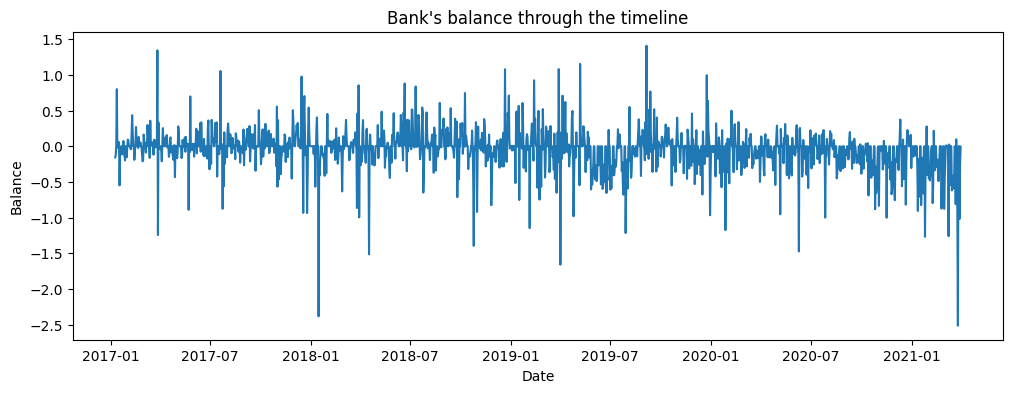

In [22]:
plot_time_series(df, x='Date', y='Balance', title='Bank\'s balance through the timeline', ylabel='Balance')

Не наблюдается явной сезонности, тренда и цикла.

Наблюдается неравномерность дисперсии вдоль времени.

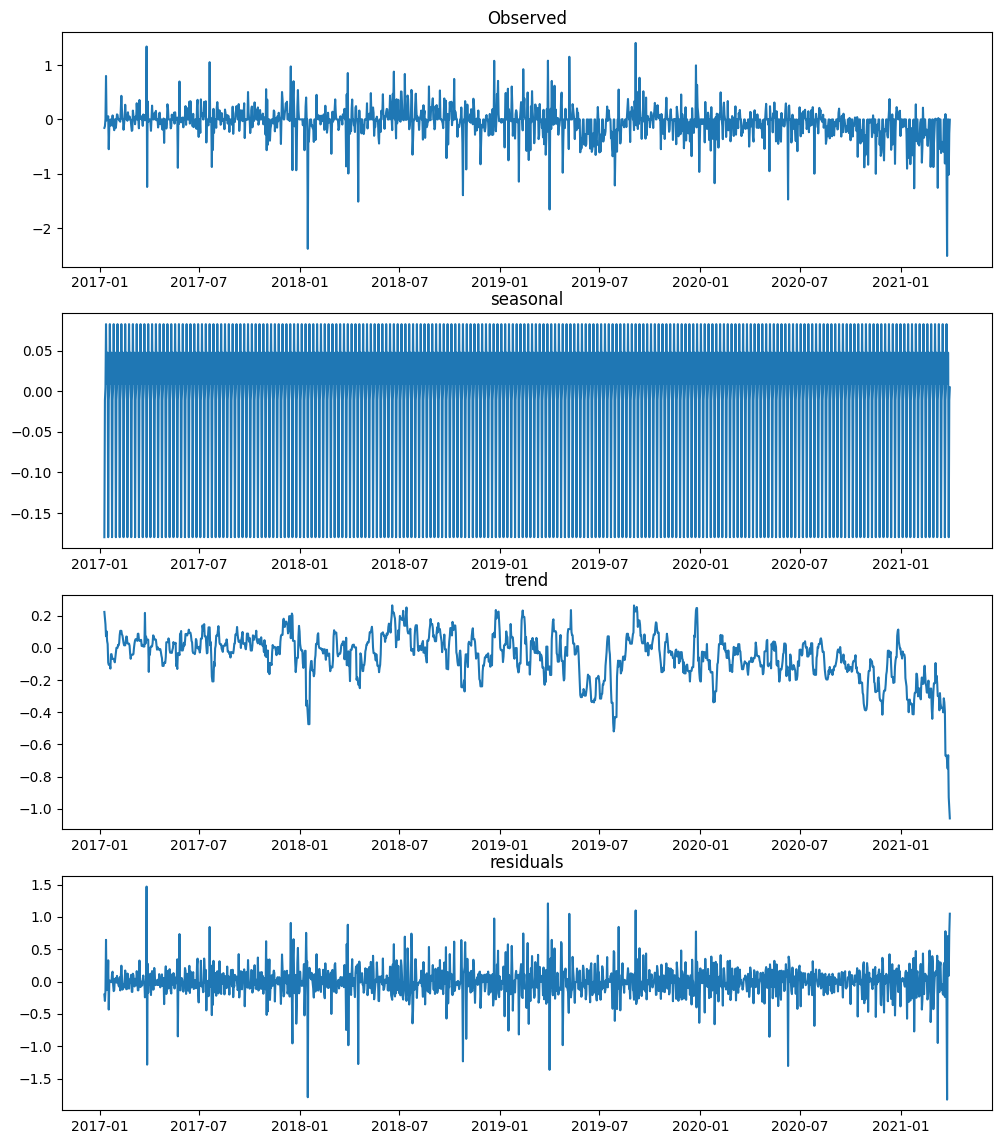

In [40]:
additive_decompose = seasonal_decompose(df.set_index('Date')['Balance'], model='additive', extrapolate_trend='freq')
plot_decomposition(additive_decompose, df['Date'])

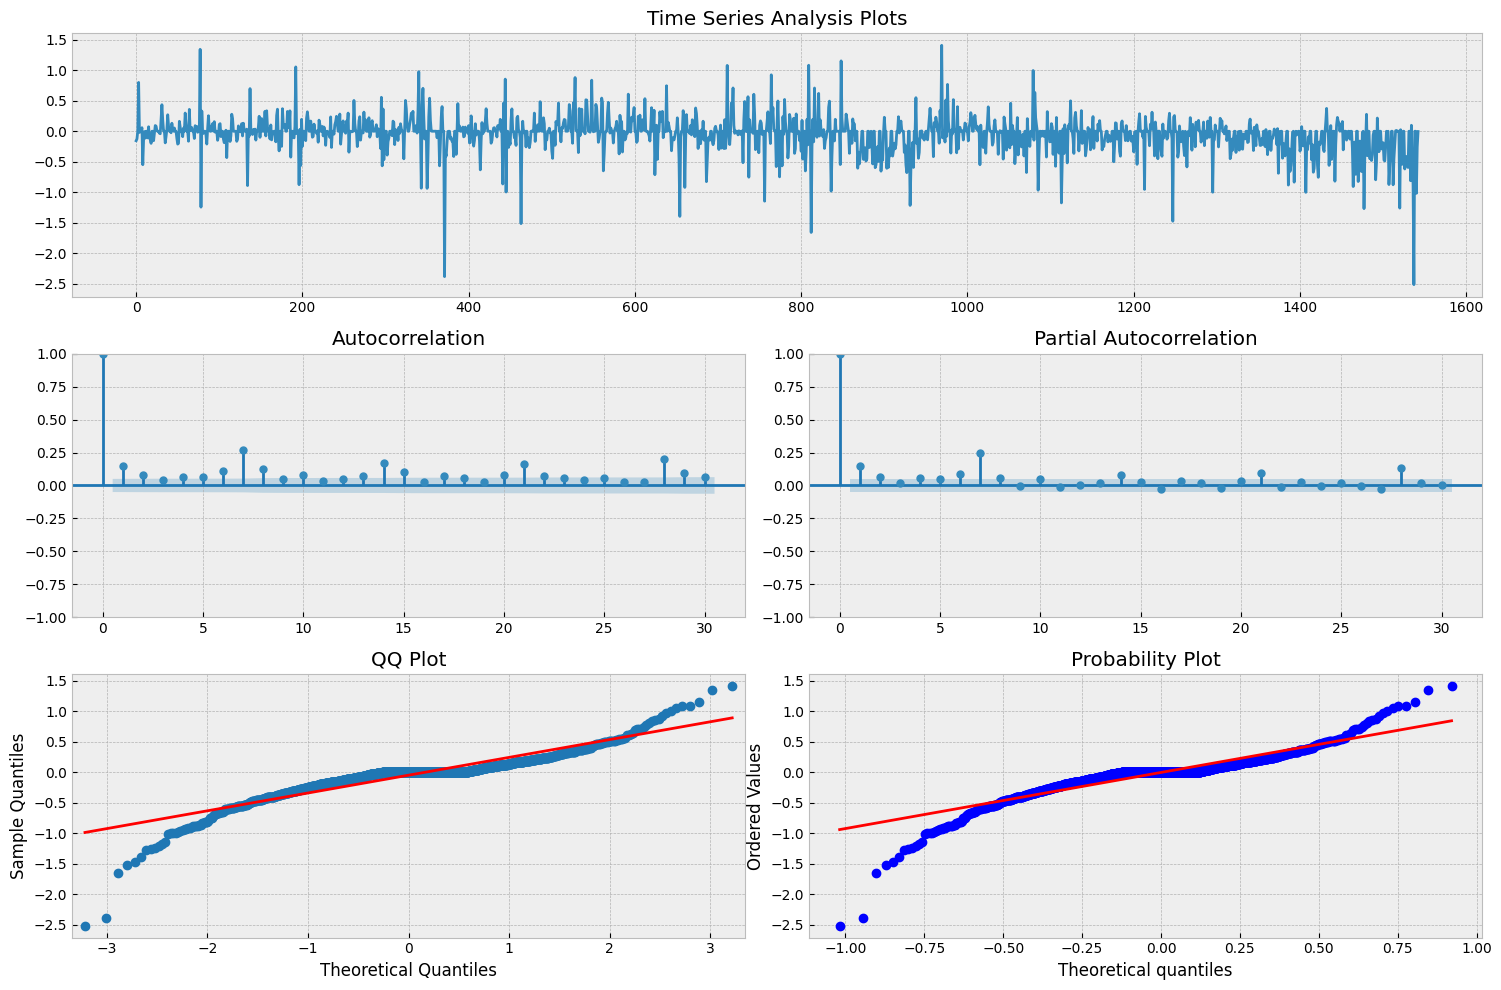

In [46]:
tsplot(df['Balance'], 30)

In [48]:
# По критерию Дики-Фуллера ряд является стационарным
result = adfuller(df['Balance'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.114100818802717
p-value: 0.000917831564952946
Critial Values:
   1%, -3.4346537865963596
Critial Values:
   5%, -2.8634408535813285
Critial Values:
   10%, -2.5677819879092625


In [26]:
k = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
k

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [5]:
# Такое же количество объектов как и в оригинальном наборе данных
features_df = pd.read_csv('../data/features.csv', index_col=0)
features_df.head()

,Date,Income,Outcome,Balance,Налог на прибыль (при уплате только ежеквартальных авансовых платежей),Зарплаты и авансы (не позднее 15 и 30 числа каждого месяца),Праздники РФ,Inflation Rate MoM: actual,Inflation Rate MoM: forecastCorrection,Balance of Trade: actual,...,BZ=F,IMOEX.ME,USDRUB=X,Balance lag 1,Balance lag 2,Balance lag 3,Balance lag 4,Balance lag 5,Balance lag 6,Balance lag 7
0,2017-01-09,1.340000,1.490000,-0.155904,0.0,0.600000,0.0,0.6,-0.1,11.45,...,54.939999,2211.250000,59.564999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-10,1.068610,1.194182,-0.125572,0.0,0.666667,0.0,0.6,-0.1,11.45,...,53.639999,2237.489990,60.102501,-0.155904,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-11,0.944429,0.936663,0.007767,0.0,0.733333,0.0,0.6,-0.1,11.45,...,55.099998,2218.610107,60.139999,-0.125572,-0.155904,NaN,NaN,NaN,NaN,NaN
3,2017-01-12,1.670000,0.875379,0.800391,0.0,0.800000,0.0,0.6,-0.1,11.45,...,56.009998,2212.000000,59.778099,0.007767,-0.125572,-0.155904,NaN,NaN,NaN,NaN
4,2017-01-13,0.955924,0.975645,-0.019721,0.0,0.866667,0.0,0.6,-0.1,11.45,...,55.450001,2195.189941,59.432499,0.800391,0.007767,-0.125572,-0.155904,NaN,NaN,NaN


In [6]:
features_df.shape

(1543, 41)

In [9]:
df.shape

(1543, 4)